In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

# always useful
import numpy as np
import pandas as pd
np.random.seed(1143149)

1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


The integral of the histograms is --->  96.0
The sum of all gaussian functions normalized is ---> 99.99715615378464


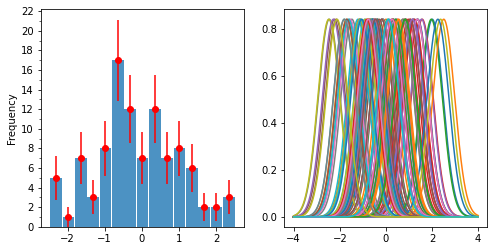

In [235]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
from scipy.stats import norm
from scipy.integrate import trapz

N=100
n_bins=15

x= np.array(np.random.randn(N))

#------making a histogram
fig, (ax, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax.hist(x, bins=n_bins, rwidth=0.95, alpha=0.8)

ax.set_ylabel("Frequency")
ax.yaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))


#making a plot of point with error bars corresponding to histogram counts
y,bin_edges = np.histogram(x,n_bins)

print('The integral of the histograms is ---> ', trapz(y))

bin_x_centres = 0.5*(bin_edges[:-1] + bin_edges[1:])
err_poiss=np.sqrt(y)

dots=ax.plot(bin_x_centres,y, 'ro')
err_bars=ax.errorbar(bin_x_centres,y,yerr=err_poiss, fmt="none", color='r')
 
#making gaussian on each point
std=1.06*x.std() * x.size**(-1/5)
num_int=1000
t = np.arange(-4,4,num_int**(-1))

for i in x:
        ax2.plot(t, norm.pdf(t, i, std))
        
        
sums=np.sum([norm.pdf(t,i,std) for i in x])

print('The sum of all gaussian functions normalized is --->', sums/num_int)

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

In [207]:
#! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png 
from IPython.display import Image
Image('two_categories_scatter_plot.png')

FileNotFoundError: No such file or directory: 'two_categories_scatter_plot.png'

FileNotFoundError: No such file or directory: 'two_categories_scatter_plot.png'

<IPython.core.display.Image object>

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot